# Análisis de Datos Bursátiles: Estadística Descriptiva

Este análisis explora estadísticas descriptivas trabajando con datos bursátiles de compañías españolas en incrementos diarios.



In [36]:
modules = ["meteostat", "plotly","seaborn"]

import sys
import os.path
from subprocess import check_call
import importlib
import os

def instala(modules):
    print("Instalando módulos")
    for m in modules:
        # para el import quitamos [...] y ==...
        p = m.find("[")
        mi = m if p==-1 else m[:p]
        p = mi.find("==")
        mi = mi if p==-1 else mi[:p]
        torch_loader = importlib.util.find_spec(mi)
        if torch_loader is not None:
            print(m," encontrado")
        else:
            print(m," No encontrado, instalando...",end="")  
            try:        
                r = check_call([sys.executable, "-m", "pip", "install", "--user", m])
                print("¡hecho!")
            except:
                print("¡Problema al instalar ",m,"! ¿seguro que el módulo existe?",sep="")

    print("¡Terminado!")

instala(modules) 

Instalando módulos
meteostat  encontrado
plotly  encontrado
seaborn  encontrado
¡Terminado!


**Análisis 1** Leer el fichero a partir de la URL (que esta vez sí está), teniendo en cuenta que la columa `Fecha` es de tipo Date. Dejar el resultado en un dataframe `df_raw`

In [37]:
import pandas as pd

url = "https://github.com/RafaelCaballero/tdm/raw/refs/heads/master/datos/IBEX6000Inc.zip"

# solución
df_raw = pd.read_csv(url, compression='zip', parse_dates=['Fecha'])


## dejar este código sin tocar
df_raw.index = df_raw.Fecha # para que el índice sea la fecha
df_raw

,BBVA,Iberdrola,Inditex,Repsol,Santander,Día,Semana,Luna,Temperatura,Fecha
Fecha,,,,,,,,,,
2001-05-25,-0.0187,-0.0228,-0.0017,-0.0069,-0.0161,Viernes,21,Creciente,23.4,2001-05-25
2001-05-28,0.0133,0.0000,-0.0061,-0.0055,0.0073,Lunes,22,Nueva,28.2,2001-05-28
2001-05-29,0.0025,-0.0097,0.0095,-0.0153,-0.0099,Martes,22,Nueva,29.5,2001-05-29
2001-05-30,0.0006,-0.0052,0.0017,-0.0042,0.0018,Miércoles,22,Nueva,28.5,2001-05-30
2001-05-31,0.0056,0.0079,0.0138,-0.0024,0.0246,Jueves,22,Nueva,29.6,2001-05-31
...,...,...,...,...,...,...,...,...,...,...
2024-10-03,0.0086,0.0037,-0.0012,0.0129,0.0002,Jueves,40,Nueva,19.3,2024-10-03
2024-10-04,0.0234,-0.0088,-0.0012,0.0144,0.0120,Viernes,40,Creciente,17.5,2024-10-04
2024-10-07,0.0105,-0.0048,0.0108,0.0089,0.0179,Lunes,41,Menguante,17.5,2024-10-07


Para entender mejor los datos 

In [38]:
def info_df(df):
    return pd.DataFrame({
        'Columna': df.columns,
        'No Nulos': df.notnull().sum().values,
        'Nulos': df.isnull().sum().values,
        'Tipo Python': df.dtypes.values,
        'Núm. valores': [ df[col].cat.ordered  if isinstance(df[col].dtype, pd.CategoricalDtype) else None
            for col in df.columns  ]
    })

for col in df_raw.columns:
    if len(df_raw[col].unique())<30:
        print(df_raw[col].value_counts())
        print("="*50)
        
info_df(df_raw)

Día
Miércoles    1209
Martes       1208
Jueves       1208
Lunes        1189
Viernes      1186
Name: count, dtype: int64
Luna
Nueva        4502
Creciente     656
Llena         479
Menguante     363
Name: count, dtype: int64


,Columna,No Nulos,Nulos,Tipo Python,Núm. valores
0,BBVA,6000,0,float64,None
1,Iberdrola,6000,0,float64,None
2,Inditex,6000,0,float64,None
3,Repsol,6000,0,float64,None
4,Santander,6000,0,float64,None
5,Día,6000,0,object,None
6,Semana,6000,0,int64,None
7,Luna,6000,0,object,None
8,Temperatura,6000,0,float64,None
9,Fecha,6000,0,datetime64[ns],None


**Análisis 2**
En el dataframe `df` (una copia de `df_raw`) convertir las columnas de tipo ordinal o intervalo a categoría ordenadas de Python (`ordered=True`) y las de tipo categoría a categoría no ordenada (`ordered=True`) de Python. Inspirarse en el siguiente ejemplo:

    from pandas.api.types import CategoricalDtype 
    cat_type = CategoricalDtype(categories=["poco","bastante","mucho"], ordered=True) # indicar el orden que se desee
    df["IloveU"] = df["IloveU"].astype(cat_type)

En el caso de una columna numérica lo mejor es aprovechar el orden ya existente haciendo algo así

    valores = np.sort(df["Minutos"].dropna().unique())
    cat_type = CategoricalDtype(categories=valores, ordered=True) 
    df["Semana"] = df["Semana"].astype(cat_type)
    


In [39]:
import numpy as np
from pandas.api.types import CategoricalDtype 

df = df_raw.copy()

# Solución
from pandas.api.types import CategoricalDtype 
cat_dia = CategoricalDtype(categories=["Lunes","Martes","Miércoles","Jueves","Viernes"], ordered=True) # indicar el orden que se desee
df["Día"] = df["Día"].astype(cat_dia)
    
valores = np.sort(df["Semana"].dropna().unique())
cat_semana = CategoricalDtype(categories=valores, ordered=True) 
df["Semana"] = df["Semana"].astype(cat_semana)

#Releyendo el enunciado creería que la luna también debería ser categórica, aunque no recuerdo si se comentó algo en clase para no hacerlo
fases_luna = df['Luna'].unique()
cat_luna = CategoricalDtype(categories=fases_luna, ordered=False)
df['Luna'] = df['Luna'].astype(cat_luna)

info_df(df)

,Columna,No Nulos,Nulos,Tipo Python,Núm. valores
0,BBVA,6000,0,float64,None
1,Iberdrola,6000,0,float64,None
2,Inditex,6000,0,float64,None
3,Repsol,6000,0,float64,None
4,Santander,6000,0,float64,None
5,Día,6000,0,category,True
6,Semana,6000,0,category,True
7,Luna,6000,0,category,False
8,Temperatura,6000,0,float64,None
9,Fecha,6000,0,datetime64[ns],None


**Análisis 3** 

a) Mostrar la media de BBVA restringido a los jueves y la media de BBVA restringido a los viernes

b) Mostrar la media de BBVA con luna llena y con luna nueva

In [22]:
# Solución parte a)

# Filtrar filas donde el día es 'Jueves' y 'Viernes'
filtroJ = df["Día"] == "Jueves"
filtroV = df["Día"] == "Viernes"


# Calcular la media de 'BBVA' para los jueves y los viernes
media_bbva_jueves = df[filtroJ].BBVA.mean() 
media_bbva_viernes = df[filtroV].BBVA.mean() 

print(f"Media de BBVA los jueves: {media_bbva_jueves}")
print(f"Media de BBVA los viernes: {media_bbva_viernes}")

Media de BBVA los jueves: 0.0007047185430463577
Media de BBVA los viernes: 0.00033937605396290046


In [23]:
# Solución parte b)

# Filtrar filas donde la fase lunar es 'Llena' y 'Nueva'
filtro_luna_llena= df["Luna"]=="Llena"
filtro_luna_nueva = df["Luna"]=="Nueva"

# Calcular la media de 'BBVA' para luna llena y luna nueva
df[filtro_luna_llena].BBVA.mean(), df[filtro_luna_nueva].BBVA.mean()

(-0.00012066805845511457, 0.00043031985784095953)

**Análisis 4** 

 a) Crear una nueva columna `Suma` en `df `que tenga la suma de BBVA, Iberdrola, Inditex, Repsol, Santander	
 b) ¿Qué día alcanzó esa columna el máximo? mostrar la fila completa 

In [24]:
# Solución parte a)

# Lista de empresas a sumar
valores_filtro_empresa = ['Santander', 'BBVA', 'Iberdrola', 'Inditex', 'Repsol'] 

# Calcular la suma de las empresas y crear la nueva columna 'suma'
df["suma"] = df[valores_filtro_empresa].sum(axis=1)



# Solución parte b)

# Encontrar el índice de la fila con el valor máximo en 'suma'
# Obtener la fila completa correspondiente al máximo
df.loc[
    df["suma"] == df["suma"].max()
]

,BBVA,Iberdrola,Inditex,Repsol,Santander,Día,Semana,Luna,Temperatura,Fecha,suma,BBVArol,Santaroll
Fecha,,,,,,,,,,,,,
2010-05-10,0.2203,0.1431,0.0907,0.1194,0.2322,Lunes,19,Menguante,13.0,2010-05-10,0.8057,0.00186,0.00178


**Análisis 5** 

a) Histograma de la columna Santander y histograma de Iberdrola conjuntamente, en el mismo gráfico.
Ideas: 
- Recordar que el primer histograma devuelve un valor ax que se puede pasar al segundo (`ax=ax`)  para seguir trabajando en el mismo gráfico como hacíamos en el análisis anterior con la función de densidad y el histograma
- Se puede añadir también en ambos histogramas `alpha=0.5`

b) Diagrama de barras de la columna `Luna`

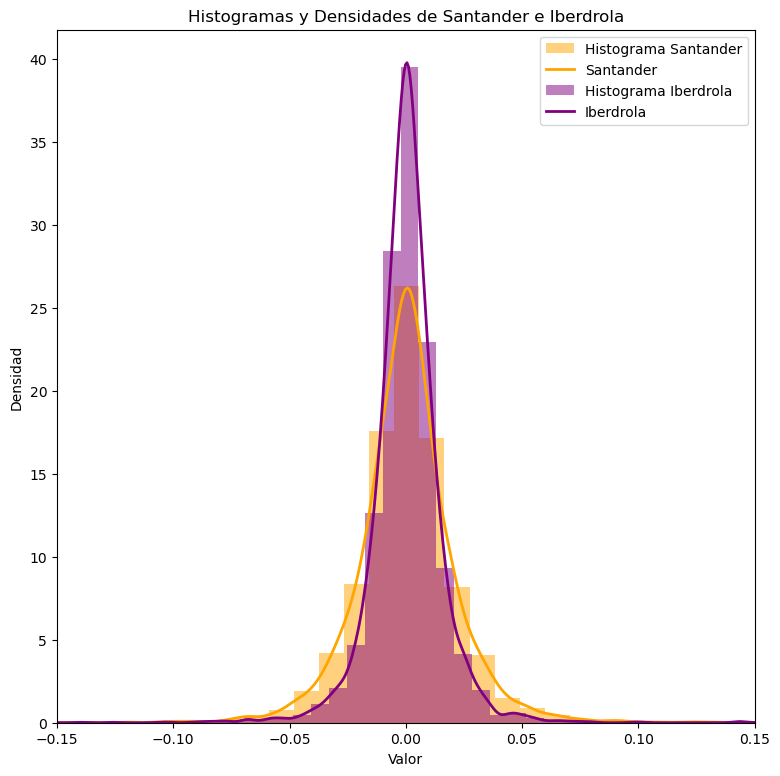

In [8]:
import matplotlib.pyplot as plt
# solución a)

#Grafico
plt.figure(figsize=(9, 9)) 
ax = df.Santander.plot(kind="hist", density=True, alpha=0.5, bins=40, color='orange', label='Histograma Santander')
df.Santander.plot(kind="density", color="orange", linewidth=2, ax=ax)

df.Iberdrola.plot(kind="hist", density=True, alpha=0.5, bins=40, color='purple', label='Histograma Iberdrola', ax=ax)
df.Iberdrola.plot(kind="density", color="purple", linewidth=2, ax=ax)

plt.xlim(-0.15, 0.15)
plt.legend()
plt.title('Histogramas y Densidades de Santander e Iberdrola')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.show()

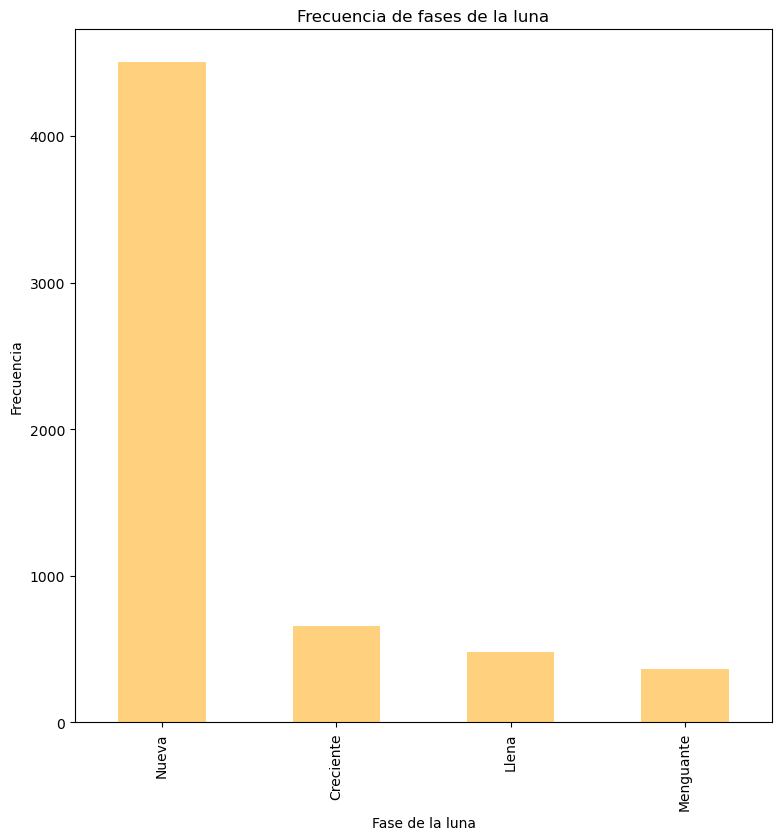

In [9]:
# Solución b)

plt.figure(figsize=(9, 9))
df.Luna.value_counts().plot(kind="bar", color="orange", alpha=0.5)
plt.title("Frecuencia de fases de la luna")
plt.xlabel("Fase de la luna")
plt.ylabel("Frecuencia")

plt.show()

**Análisis 6** En matplotlib queremos hacer una gráfica de líneas para el año 2024 que represente los valores de Santander y BBVA. 
Para filtrar por el año recoradar que `df.Fecha.dt.year`  es el año asociado a cada fila

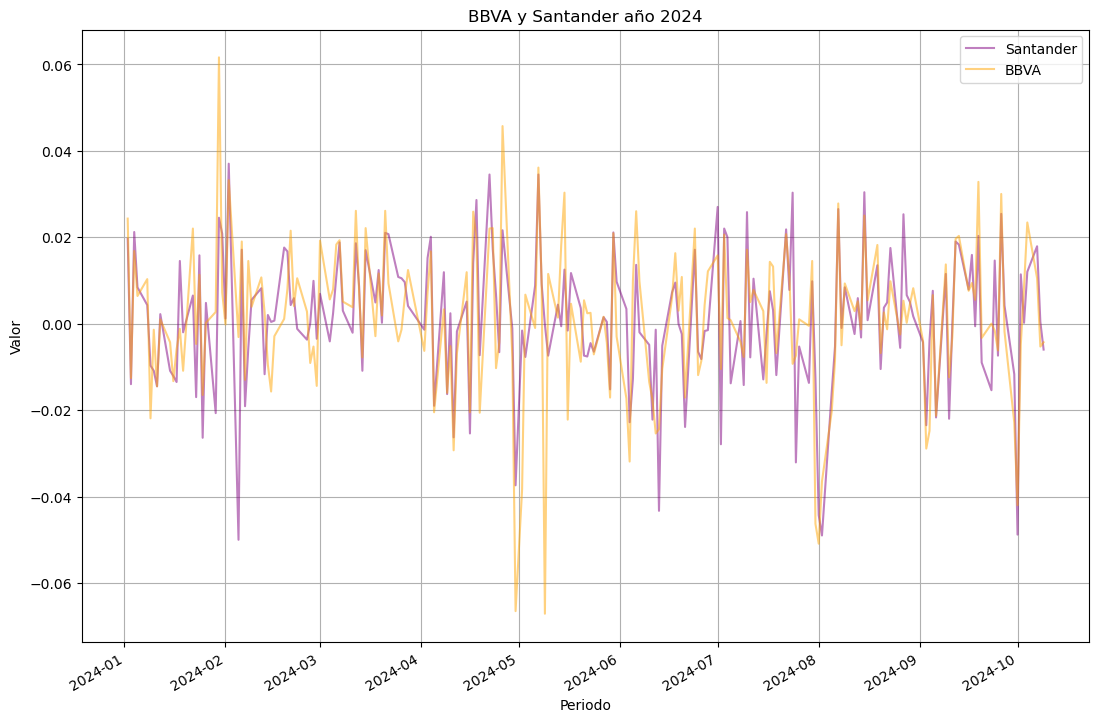

In [10]:
# solución
df_anio=df[df.Fecha.dt.year==2024]

plt.figure(figsize=(13, 9))
df_anio.Santander.plot(kind="line", color="purple", alpha=0.5, linestyle='-',linewidth=1.5, label='Santander')
df_anio.BBVA.plot(kind="line", color="orange", alpha=0.5, linestyle='-',linewidth=1.5, label='BBVA')

plt.title("BBVA y Santander año 2024")
plt.xlabel("Periodo")
plt.ylabel("Valor")
plt.legend()
plt.grid()

**Análisis 7**
Queremos hacer un boxplot de todos los valores. Para ello necesitaremos tener el formato largo, algo que se consigue con la instrucción `melt`


In [29]:
# Transformar el DataFrame a formato largo
df_largo = df.melt(
                    id_vars='Fecha', 
                    value_vars=['Santander', 'BBVA', 'Iberdrola', 'Inditex', 'Repsol'], 
                    var_name='Empresa', 
                    value_name='Valor')

df_largo

,Fecha,Empresa,Valor
0,2001-05-25,Santander,-0.0161
1,2001-05-28,Santander,0.0073
2,2001-05-29,Santander,-0.0099
3,2001-05-30,Santander,0.0018
4,2001-05-31,Santander,0.0246
...,...,...,...
29995,2024-10-03,Repsol,0.0129
29996,2024-10-04,Repsol,0.0144
29997,2024-10-07,Repsol,0.0089
29998,2024-10-08,Repsol,-0.0290


Mostrar usando la librería que se prefiera los boxplots a partir de `df_largo`

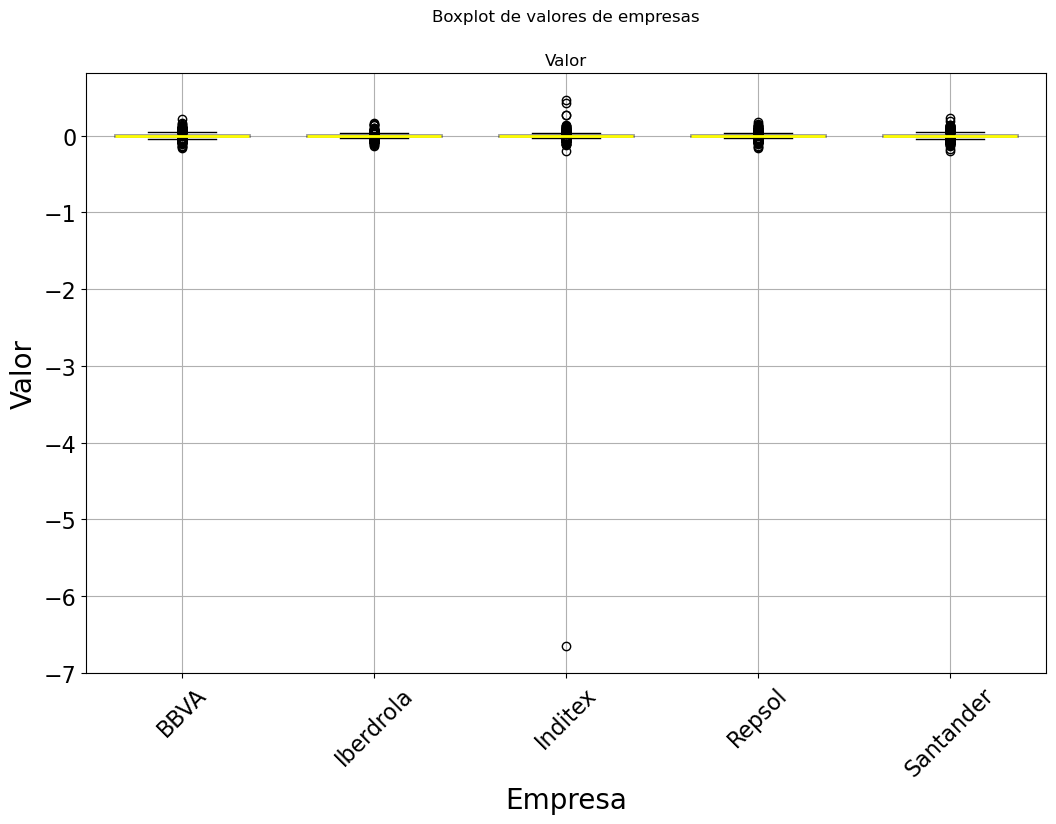

In [30]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=100)

df_largo.boxplot(column='Valor', by='Empresa', 
                 ax=ax,
                  widths = .7,
             patch_artist=True,
             medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
             boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
                 )


fig.suptitle('Boxplot de valores de empresas')
plt.ylabel('Valor', fontsize = 20)
plt.xlabel('Empresa', fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

plt.xticks(rotation=45)

plt.show()

**Análisis 8** Posiblemente los boxplots se ven muy mal por un outlier muy negativo de Inditex. Repetir el gráfico tras generar un dataframe `df_largo2`que es una copia de  `df_largo` salvo porque se han suprimido los valores menores a -1 o mayores 1 de la columna `Valor`

In [33]:
#Solución

# Filtrar los datos para eliminar outliers
df_largo2=df_largo.loc[
    ( df_largo.Valor >=-1 ) & ( df_largo.Valor <= 1 )
]

# Imprimir los valores máximos y mínimos después y antes del filtrado
print("Máximo después del filtrado:", df_largo2['Valor'].max())
print("Mínimo después del filtrado:", df_largo2['Valor'].min())

print("Máximo antes del filtrado:", df_largo['Valor'].max())
print("Mínimo antes del filtrado:", df_largo['Valor'].min())


Máximo después del filtrado: 0.46
Mínimo después del filtrado: -0.1989
Máximo antes del filtrado: 0.46
Mínimo antes del filtrado: -6.6483


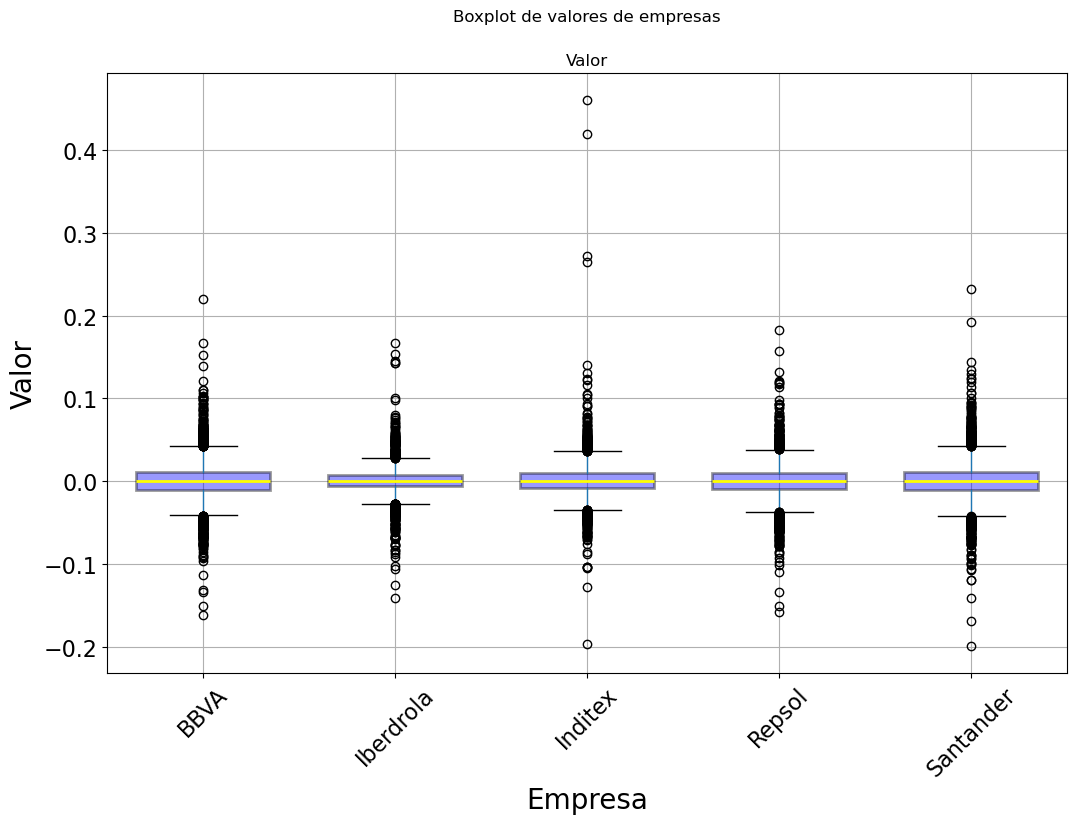

In [14]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=100)

df_largo2.boxplot(column='Valor', by='Empresa', 
                 ax=ax,
                  widths = .7,
             patch_artist=True,
             medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
             boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
                 )


fig.suptitle('Boxplot de valores de empresas')
plt.ylabel('Valor', fontsize = 20)
plt.xlabel('Empresa', fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

plt.xticks(rotation=45)

plt.show()

**Análisis 9**
Queremos utilizar el método Hampel X84 con $\theta=8$ para encontrar outliers en Iberdrola. Mostrar las fechas en las que este valor ha tenidos valores demasiado altos o demasiado bajos según este criterio 


In [15]:
from scipy.stats import median_abs_deviation

# Definir el parámetro theta y la empresa a analizar
theta = 8
empresa = "Iberdrola"

# Filtrar los datos de Iberdrola en df_largo2
data_iberdrola = df_largo2[df_largo2["Empresa"] == empresa][['Fecha', 'Valor']]

# Calcular la mediana y el MAD (Desviación Absoluta de la Mediana)
mediana = data_iberdrola['Valor'].median()
MAD = median_abs_deviation(data_iberdrola['Valor'])

# Calcular los límites inferior y superior usando el método Hampel X84
inferior = mediana - 1.4826 * theta * MAD
superior = mediana + 1.4826 * theta * MAD

# Identificar los outliers inferiores y superiores
outliers_inf = data_iberdrola[data_iberdrola['Valor'] < inferior]
outliers_sup = data_iberdrola[data_iberdrola['Valor'] > superior]

# Mostrar las fechas y los valores de los outliers inferiores
print("Outliers inferiores de Iberdrola:")
print(outliers_inf.sort_values('Valor'))

# Mostrar las fechas y los valores de los outliers superiores
print("\nOutliers superiores de Iberdrola:")
print(outliers_sup.sort_values('Valor', ascending=False))

# Mostrar los límites calculados
print(f"\nLímites con Hampel X84, theta={theta}:")
print(f"Inferior = {inferior}")
print(f"Superior = {superior}")

Outliers inferiores de Iberdrola:
           Fecha   Valor
16826 2020-03-12 -0.1406
13724 2008-01-21 -0.1258
13910 2008-10-10 -0.1057
15876 2016-06-24 -0.1020
13842 2008-07-08 -0.0914
13929 2008-11-06 -0.0880
13909 2008-10-09 -0.0856
13918 2008-10-22 -0.0831
13913 2008-10-15 -0.0829

Outliers superiores de Iberdrola:
           Fecha   Valor
13727 2008-01-24  0.1669
13912 2008-10-14  0.1534
13390 2006-09-27  0.1446
14307 2010-05-10  0.1431
13941 2008-11-24  0.1426
16829 2020-03-17  0.1008
13951 2008-12-08  0.0981

Límites con Hampel X84, theta=8:
Inferior = -0.08143952
Superior = 0.08223952


**Análisis 10** En el ejercicio 6 ya hemos visto que incluso limitándonos a un año los datos salen un poco apelotonados, así que si intentáramos mostrar los datos desde el principio no se vería nada. Una solución para evitar esto es utilizar la media móvil. La idea es que cada punto valor pasa a ser el media de los $n$ anteriores. El número de puntos no cambia, pero la gráfica se "suaviza" ya que los cambios puntuales se ven moderados por la media de los que le rodean. 

En Pandas esto se puede hacer con la función `rolling` (ver [aquí](https://stackoverflow.com/questions/40060842/moving-average-pandas) algún ejemplo similar a lo que queremos hacer)

a) Añadir al dataframe `df` dos columnas  `'BBVArol'` y `'Santaroll'` que contengan, respectivamente, la media móvil de BBVA y Santander, ambas con una ventana de 50 días.

b) Mostrar las nuevas columnas en Pandas de forma similar al ejercicio 6. Solo notar que ya no queremos filtrar el dataframe para limitarlo por fechas; justo por eso estamos haciendo la media movil, para poder mostrar todo el rango de fechas (bueno, salvo las 50 primeras, que en las nuevsa columans están a NaN, pero no importa)

In [34]:
#Solución

# Calcular las medias móviles de 50 días
df["BBVArol"]=df["BBVA"].rolling(window=50).mean()
df["Santaroll"]=df["Santander"].rolling(window=50).mean()

df

,BBVA,Iberdrola,Inditex,Repsol,Santander,Día,Semana,Luna,Temperatura,Fecha,suma,BBVArol,Santaroll
Fecha,,,,,,,,,,,,,
2001-05-25,-0.0187,-0.0228,-0.0017,-0.0069,-0.0161,Viernes,21,Creciente,23.4,2001-05-25,-0.0662,NaN,NaN
2001-05-28,0.0133,0.0000,-0.0061,-0.0055,0.0073,Lunes,22,Nueva,28.2,2001-05-28,0.0090,NaN,NaN
2001-05-29,0.0025,-0.0097,0.0095,-0.0153,-0.0099,Martes,22,Nueva,29.5,2001-05-29,-0.0229,NaN,NaN
2001-05-30,0.0006,-0.0052,0.0017,-0.0042,0.0018,Miércoles,22,Nueva,28.5,2001-05-30,-0.0053,NaN,NaN
2001-05-31,0.0056,0.0079,0.0138,-0.0024,0.0246,Jueves,22,Nueva,29.6,2001-05-31,0.0495,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-03,0.0086,0.0037,-0.0012,0.0129,0.0002,Jueves,40,Nueva,19.3,2024-10-03,0.0242,-0.001260,-0.000416
2024-10-04,0.0234,-0.0088,-0.0012,0.0144,0.0120,Viernes,40,Creciente,17.5,2024-10-04,0.0398,-0.000812,-0.000070
2024-10-07,0.0105,-0.0048,0.0108,0.0089,0.0179,Lunes,41,Menguante,17.5,2024-10-07,0.0433,-0.000592,0.000562


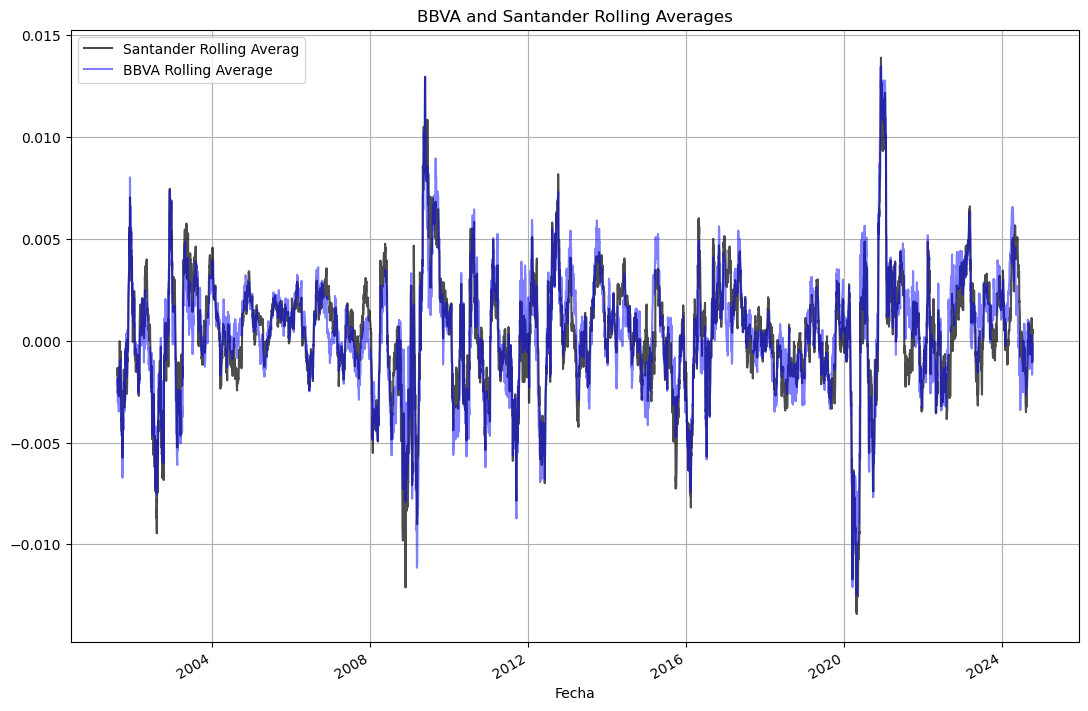

In [35]:
plt.figure(figsize=(13, 9))
df.Santaroll.plot(kind="line", color="black", alpha=0.7, linestyle='-',linewidth=1.5, label='Santander Rolling Averag')
df.BBVArol.plot(kind="line", color="blue", alpha=0.5, linestyle='-',linewidth=1.5, label='BBVA Rolling Average')

plt.title("BBVA and Santander Rolling Averages")
plt.legend()
plt.grid()
plt.show()

¡Ya está! Recordar subir la solución. El código comentado de abajo es (más o menos) el que he usado para generar el dataset.

In [ ]:
"""

import yfinance as yf
import pandas as pd
from meteostat import Point, Daily

def fase_lunar(fecha):
    # Crear un objeto de la luna para la fecha dada
    luna = ephem.Moon(fecha)
    
    # Obtener la fase lunar (fracción iluminada de la luna)
    fase = luna.phase  # La fase lunar en grados (0 a 360)
    
    # Determinar la fase lunar en base a la fracción iluminada
    if fase == 0:
        return "Nueva"
    elif 0 < fase < 90:
        return "Creciente"
    elif fase == 180:
        return "Llena"
    elif 90 <= fase < 180:
        return "Creciente"
    else:
        return "Menguante"

# Función para obtener la temperatura media en Madrid
def obtener_temperatura(fecha, ciudad=Point(40.4168, -3.7038, 667)):
    # Descargar datos diarios de Meteostat para la fecha dada
    datos = Daily(ciudad, fecha, fecha)
    datos = datos.fetch()
    
    # Si hay datos disponibles, devolver la temperatura media
    if not datos.empty:
        return datos['tavg'].values[0]  # 'tavg' es la temperatura media
    else:
        return None

# Definir los símbolos de los 5 primeros valores del IBEX 35
symbols = ['SAN.MC', 'BBVA.MC', 'IBE.MC', 'ITX.MC', 'REP.MC']  # cód. Yahoo
nombre = ['Santander', 'BBVA', 'Iberdrola', 'Inditex', 'Repsol']  # Nombre

# descargamos y nos quedamos solo con los valores al cierre
df_raw = yf.download(tickers=symbols, period='max').loc[:,"Adj Close"]

# solo queremos los incrementos diarios y solo filas in nulos
df = df_raw.dropna().pct_change().dropna()

# renombrar columna
df.columns = [nombre[symbols.index(c)] for c in df_raw.columns]
# día de la semana
df['Día'] = pd.to_datetime(df.index).day_name(locale='es_ES') 
# semana del año
df['Semana'] = df.index.isocalendar().week
# fase lunar
df['Luna'] = df.index.map(fase_lunar)
# Marte visible
df['Temperatura'] = df.index.map(obtener_temperatura)
import numpy as np
df = np.round(df,4) # 4 decimales
df.to_csv("IBEX6000Inc.csv",index=False)
df
"""